# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_4:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [106]:
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
# link : https://www.datacamp.com/community/tutorials/categorical-data
# sum of null values and coloumn wise null values
print(project_data.isnull().values.sum())
print("-"*30)
print(project_data.isnull().sum())

210983
------------------------------
Unnamed: 0                                           0
id                                                   0
teacher_id                                           0
teacher_prefix                                       3
school_state                                         0
project_submitted_datetime                           0
project_grade_category                               0
project_subject_categories                           0
project_subject_subcategories                        0
project_title                                        0
project_essay_1                                      0
project_essay_2                                      0
project_essay_3                                 105490
project_essay_4                                 105490
project_resource_summary                             0
teacher_number_of_previously_posted_projects         0
project_is_approved                                  0
dtype: int64


In [4]:
print("Number of data points in train data", project_data.shape)
print('~'*70)
print("The attributes of data :", project_data.columns.values)
project_data.head(2)

Number of data points in train data (109248, 17)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

          project_subject_categories     project_subject_subcategories  \
0                Literacy & Language                     ESL, Literacy   
1  History & Civics, Health & Sports  Civics & Government, Team Sports   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  
0                                             0                    0  
1                                             7                    1

In [5]:
print("Number of data points in resource_data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in resource_data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

# 1.2 Data Analysis

Number of projects thar are approved for funding  92706 , ( 84.85830404217927 %)
Number of projects thar are not approved for funding  16542 , ( 15.141695957820739 %)


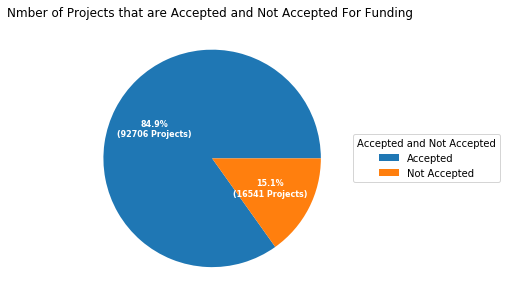

In [6]:
# PROVIDE CITATIONS TO YOUR CODE IF YOU TAKE IT FROM ANOTHER WEBSITE.
'''# CITATIONS TO CODE (A Pie Chart) : https://matplotlib.org/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py'''

y_value_counts = project_data['project_is_approved'].value_counts()
print("Number of projects thar are approved for funding ", y_value_counts[1], ", (", (y_value_counts[1]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
print("Number of projects thar are not approved for funding ", y_value_counts[0], ", (", (y_value_counts[0]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")

fig, ax = plt.subplots(figsize=(6, 5), subplot_kw=dict(aspect="equal"))
recipe = ["Accepted", "Not Accepted"]

data = [y_value_counts[1], y_value_counts[0]]
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} Projects)".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, recipe,
          title="Accepted and Not Accepted",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Nmber of Projects that are Accepted and Not Accepted For Funding ")

plt.show()

__SUMMARY : Projects that are Accepted and Not Accepted For Funding __

1.	92706 projects that are approved for funding and 84.9 % Approved.
2.	16542 projects that are not approved for funding and 15.1 % not approved.

### 1.2.1 Univariate Analysis: School State

In [7]:
# Pandas dataframe groupby count, mean: https://stackoverflow.com/a/19385591/4084039

temp = pd.DataFrame(project_data.groupby("school_state")["project_is_approved"].apply(np.mean)).reset_index()
# if you have data which contain only 0 and 1, then the mean = percentage (think about it)
temp.columns = ['state_code', 'num_proposals']

'''# How to plot US state heatmap: https://datascience.stackexchange.com/a/9620'''

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = temp['state_code'],
        z = temp['num_proposals'].astype(float),
        locationmode = 'USA-states',
        text = temp['state_code'],
        marker = dict(line = dict (color = 'rgb(255,255,255)',width = 1)),
        colorbar = dict(title = "% of pro")
    ) ]

layout = dict(
        title = 'Project Proposals % of Acceptance Rate by US States',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='us-map-heat-map')

__SUMMARY : Univariate Analysis of School State__

1.	Delaware (DE) State is the highest projects approval rate of 89 %.
2.	Vermont (VT) State has the lowest Projects approval rate of 80 %.
3.	There is some variability in the project approval rate, so it's understandable that may be the state code is useful to predict whether project has been approved or not.

In [8]:

# https://www.csi.cuny.edu/sites/default/files/pdf/administration/ops/2letterstabbrev.pdf
temp.sort_values(by=['num_proposals'], inplace=True)
print("States with lowest % approvals")
print(temp.head(5))
print('='*50)
print("States with highest % approvals")
print(temp.tail(5))

States with lowest % approvals
   state_code  num_proposals
46         VT       0.800000
7          DC       0.802326
43         TX       0.813142
26         MT       0.816327
18         LA       0.831245
States with highest % approvals
   state_code  num_proposals
30         NH       0.873563
35         OH       0.875152
47         WA       0.876178
28         ND       0.888112
8          DE       0.897959


In [9]:
#stacked bar plots matplotlib: https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
def stack_plot(data, xtick, col2='project_is_approved', col3='total'):
    ind = np.arange(data.shape[0])
    
    plt.figure(figsize=(20,5))
    p1 = plt.bar(ind, data[col3].values)
    p2 = plt.bar(ind, data[col2].values)

    plt.ylabel('Projects')
    plt.title('Number of projects aproved vs rejected')
    plt.xticks(ind, list(data[xtick].values))
    plt.legend((p1[0], p2[0]), ('total', 'accepted'))
    plt.show()

In [10]:
def univariate_barplots(data, col1, col2='project_is_approved', top=False):
    # Count number of zeros in dataframe python: https://stackoverflow.com/a/51540521/4084039
    temp = pd.DataFrame(project_data.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()

    # Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039
    temp['total'] = pd.DataFrame(project_data.groupby(col1)[col2].agg({'total':'count'})).reset_index()['total']
    temp['Avg'] = pd.DataFrame(project_data.groupby(col1)[col2].agg({'Avg':'mean'})).reset_index()['Avg']
    
    temp.sort_values(by=['total'],inplace=True, ascending=False)
    
    if top:
        temp = temp[0:top]
    
    stack_plot(temp, xtick=col1, col2=col2, col3='total')
    print(temp.head(5))
    print("="*50)
    print(temp.tail(5))

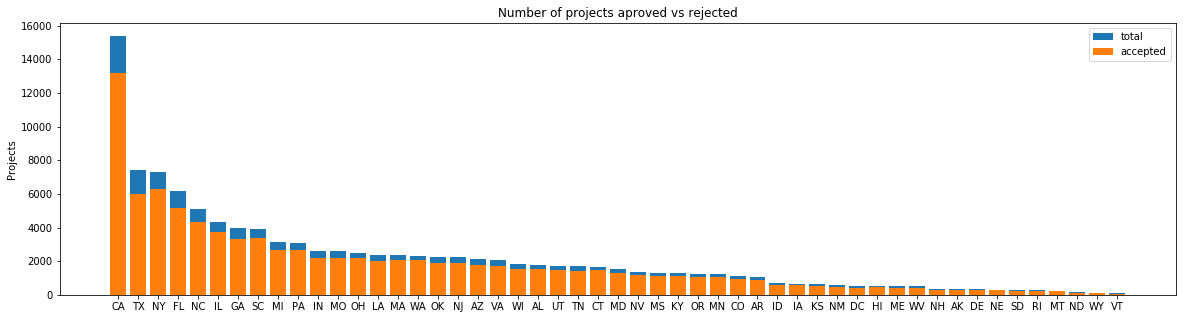

   school_state  project_is_approved  total       Avg
4            CA                13205  15388  0.858136
43           TX                 6014   7396  0.813142
34           NY                 6291   7318  0.859661
9            FL                 5144   6185  0.831690
27           NC                 4353   5091  0.855038
   school_state  project_is_approved  total       Avg
39           RI                  243    285  0.852632
26           MT                  200    245  0.816327
28           ND                  127    143  0.888112
50           WY                   82     98  0.836735
46           VT                   64     80  0.800000


In [11]:
univariate_barplots(project_data, 'school_state', 'project_is_approved', False)

__SUMMARY : univariate_barplots of school_state __  

1.	Given the train data we have bar plotted the number of projects Approved vs Rejected for 51 US_State’s.
2.	Every state has greater than 80% success rate in approval.
3.	There is lot of variability in submission of projects in state.
4.	In California (CA) State highest Projects (15388) has been submitted and average 85% projects (13205) approved.
5.	In Vermont (VT) State lowest Projects (80) has been submitted and average 80% projects (64) approved.
6.	The plot display's positively skewed distribution, positively skewed with a very long right tail.


### 1.2.2 Univariate Analysis: teacher_prefix

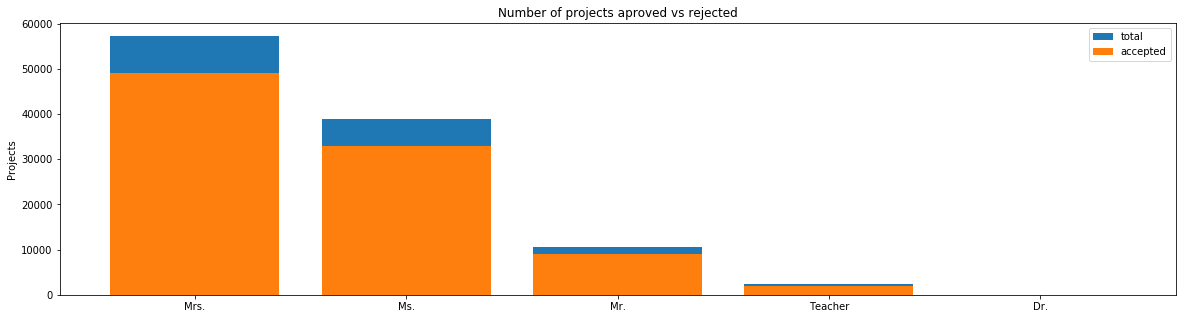

  teacher_prefix  project_is_approved  total       Avg
2           Mrs.                48997  57269  0.855559
3            Ms.                32860  38955  0.843537
1            Mr.                 8960  10648  0.841473
4        Teacher                 1877   2360  0.795339
0            Dr.                    9     13  0.692308
  teacher_prefix  project_is_approved  total       Avg
2           Mrs.                48997  57269  0.855559
3            Ms.                32860  38955  0.843537
1            Mr.                 8960  10648  0.841473
4        Teacher                 1877   2360  0.795339
0            Dr.                    9     13  0.692308


In [12]:
#link : https://stackoverflow.com/questions/37147735/remove-nan-value-from-a-set#
teacher_prefix = set((float('nan'), float('nan'), 'teacher_prefix'))
set(filter(lambda x: x == x , teacher_prefix))
univariate_barplots(project_data, 'teacher_prefix', 'project_is_approved' , top=False)

__SUMMARY : Univariate Analysis of teacher_prefix__
1. Mrs. has been submitted the highest projects(57269) and average 85 % projects(48997) accepted.
2. Dr.  teachers has been submitted the lowest projects(13) and  average 69 % projects(9) accepted . 
3. There is huge variability in projects submission .
4. "Mrs." , "Ms." and  "Mr." submitted the highest projects compare to Teacher and Dr. 

### 1.2.3 Univariate Analysis: project_grade_category

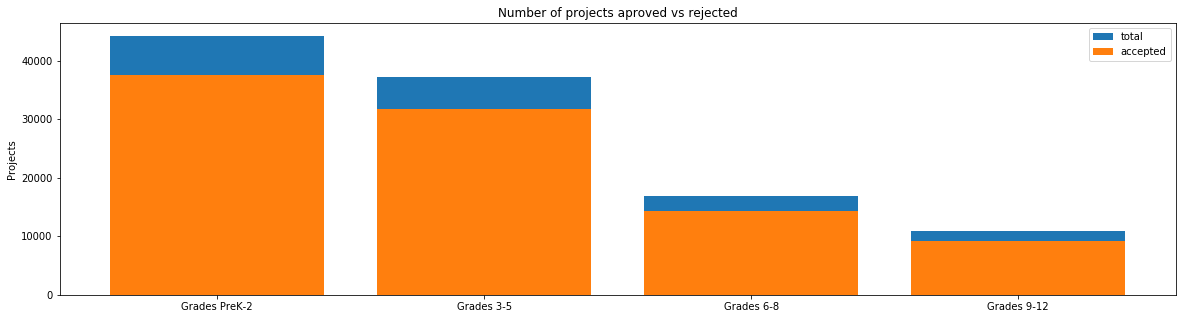

  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                37536  44225  0.848751
0             Grades 3-5                31729  37137  0.854377
1             Grades 6-8                14258  16923  0.842522
2            Grades 9-12                 9183  10963  0.837636
  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                37536  44225  0.848751
0             Grades 3-5                31729  37137  0.854377
1             Grades 6-8                14258  16923  0.842522
2            Grades 9-12                 9183  10963  0.837636


In [13]:
univariate_barplots(project_data, 'project_grade_category', 'project_is_approved', top=False)

__SUMMARY: Univariate Analysis of project_grade_category__
1. In Grades Prek-2 has been submitted the highest projects (44225) and average 84 % projects (37536) accepted.
2. In Grades 9-12 has been submitted the lowest projects (10963) and average 83% Projects (9183) accepted.
3. There is a huge variability in project submission between Grades 9-12 To Grades Prek-2.
4. Grades 3-5 is the highest approval rate of 85 %.

### 1.2.4 Univariate Analysis: project_subject_categories

In [14]:
catogories = list( project_data['project_subject_categories'].values )
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())

In [15]:
project_data['clean_categories'] = cat_list
project_data.drop("project_subject_categories", axis=1, inplace=True)
project_data.head(1)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   

  project_subject_subcategories  \
0                 ESL, Literacy   

                                      project_title  \
0  Educational Support for English Learners at Home   

                                     project_essay_1  \
0  My students are English learners that are work...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   

    clean_categories  
0  Literacy_Language

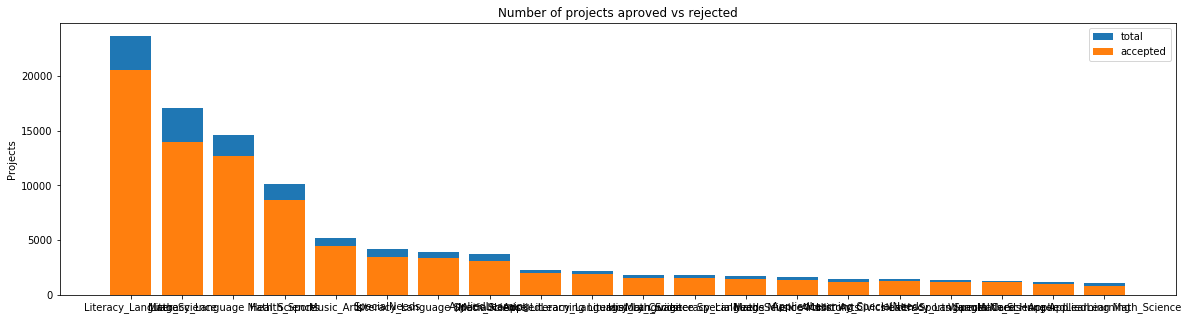

                  clean_categories  project_is_approved  total       Avg
24               Literacy_Language                20520  23655  0.867470
32                    Math_Science                13991  17072  0.819529
28  Literacy_Language Math_Science                12725  14636  0.869432
8                    Health_Sports                 8640  10177  0.848973
40                      Music_Arts                 4429   5180  0.855019
                    clean_categories  project_is_approved  total       Avg
19  History_Civics Literacy_Language                 1271   1421  0.894441
14        Health_Sports SpecialNeeds                 1215   1391  0.873472
50                Warmth Care_Hunger                 1212   1309  0.925898
33      Math_Science AppliedLearning                 1019   1220  0.835246
4       AppliedLearning Math_Science                  855   1052  0.812738


In [16]:
univariate_barplots(project_data, 'clean_categories', 'project_is_approved', top=20)

__SUMMARY: Univariate Analysis of clean_categories__
1. In Literacy_Language clean_categorie has been submitted the highest projects(23655) and average 86 % projects(20520) accepted.
2. Joint categories of Literacy_Language Math_scince is also have the 86 % approval rate. 
3. In AppliedLearning Math_Science clean_categorie  has been submitted the lowest projects(1052) and average  81% Projects(855) accepted .
4. In Warmth Care_Hunger categorie is also submitted the lowest projects(1309) and Avg 92% Projects(1212) accepted .
5. And there is a huge variability of projects submission and approval rate between Literacy_Language clean category and Warmth Care_Hunger clean category .

In [17]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

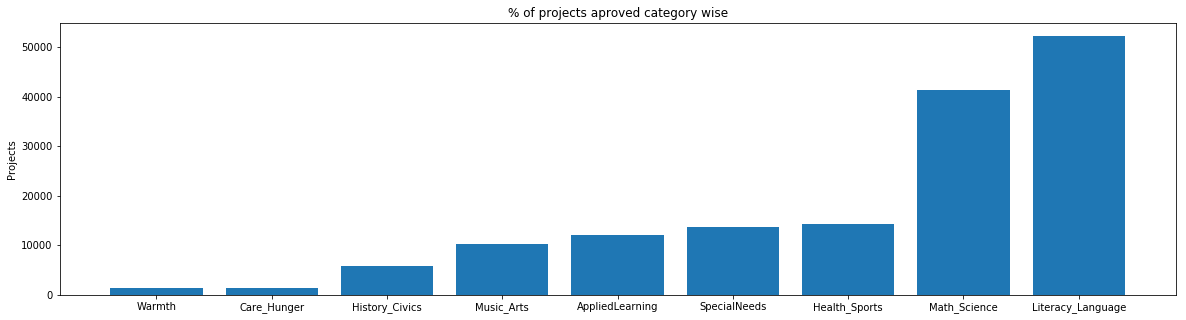

In [18]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(sorted_cat_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(sorted_cat_dict.values()))

plt.ylabel('Projects')
plt.title('% of projects aproved category wise')
plt.xticks(ind, list(sorted_cat_dict.keys()))
plt.show()

In [19]:
for i, j in sorted_cat_dict.items():
    print("{:20} :{:10}".format(i,j))

Warmth               :      1388
Care_Hunger          :      1388
History_Civics       :      5914
Music_Arts           :     10293
AppliedLearning      :     12135
SpecialNeeds         :     13642
Health_Sports        :     14223
Math_Science         :     41421
Literacy_Language    :     52239


__SUMMARY: Clean Category wise __
1. Highest projects has been submitted in Literacy_Language category .
2. Lowest projects has been submitted  in  warmth category .
3. There is a huge variability of projects submission in diffrent categories 

### 1.2.5 Univariate Analysis: project_subject_subcategories

In [22]:
sub_catogories = list( project_data['project_subject_subcategories'].values )
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039
# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

In [23]:
project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)
project_data.head(1)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   

                                      project_title  \
0  Educational Support for English Learners at Home   

                                     project_essay_1  \
0  My students are English learners that are work...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   

    clean_categories clean_subcategories  
0  Literacy_Language        ESL Literacy

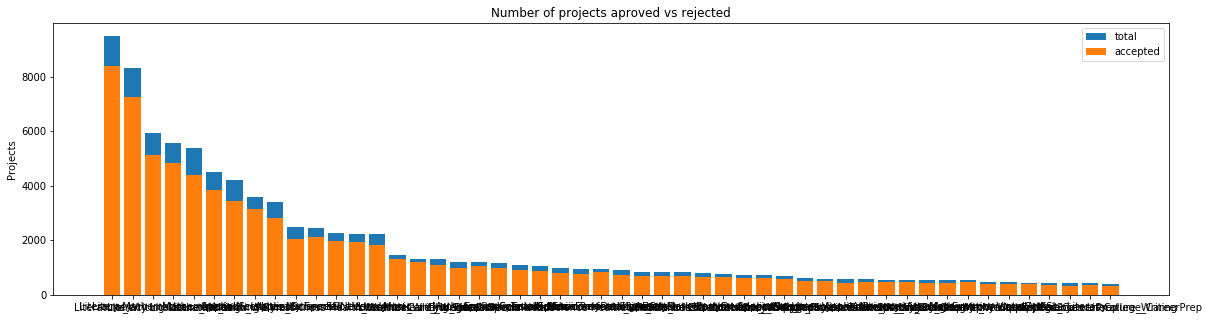

                clean_subcategories  project_is_approved  total       Avg
317                        Literacy                 8371   9486  0.882458
319            Literacy Mathematics                 7260   8325  0.872072
331  Literature_Writing Mathematics                 5140   5923  0.867803
318     Literacy Literature_Writing                 4823   5571  0.865733
342                     Mathematics                 4385   5379  0.815207
                    clean_subcategories  project_is_approved  total       Avg
196       EnvironmentalScience Literacy                  389    444  0.876126
127                                 ESL                  349    421  0.828979
79                   College_CareerPrep                  343    421  0.814727
17   AppliedSciences Literature_Writing                  361    420  0.859524
3    AppliedSciences College_CareerPrep                  330    405  0.814815


In [24]:
univariate_barplots(project_data, 'clean_subcategories', 'project_is_approved', top=50)

__SUMMARY: Univariate Analysis of clean_subcategories __
1. In Literacy clean_subcategorie has been submitted the highest projects (9486) and average 88 % projects(8371) accepted.
2. In AppliedSciences College_CareerPrep clean_subcategorie has been submitted the lowest projects (405) and average 81% Projects (330) accepted.
3. In EnvironmentalScience Literacy clean_subcategorie is also submitted the lowest projects (444) and average 87% Projects (389) accepted
4. There is a huge variability in approval rate between Literacy clean_subcategorie and Environmental Science Literacy.
5. The plot display's positively skewed distribution, positively skewed with a very long right tail.


In [25]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())

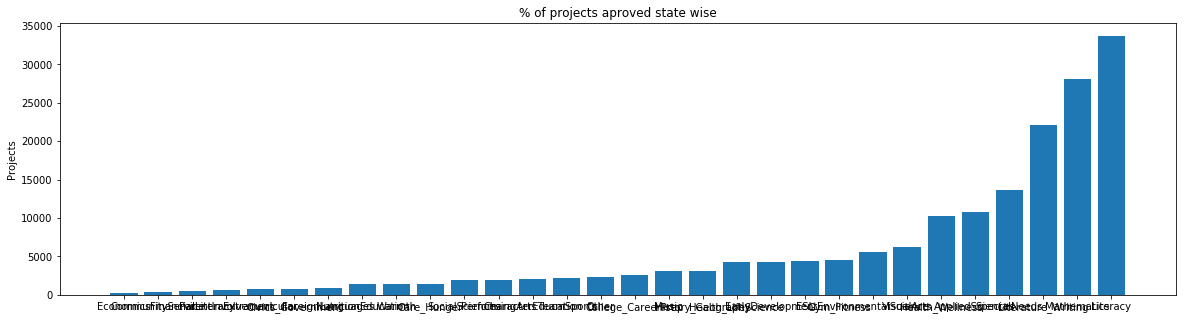

In [26]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(sorted_sub_cat_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(sorted_sub_cat_dict.values()))

plt.ylabel('Projects')
plt.title('% of projects aproved state wise')
plt.xticks(ind, list(sorted_sub_cat_dict.keys()))
plt.show()

In [27]:
for i, j in sorted_sub_cat_dict.items():
    print("{:20} :{:10}".format(i,j))

Economics            :       269
CommunityService     :       441
FinancialLiteracy    :       568
ParentInvolvement    :       677
Extracurricular      :       810
Civics_Government    :       815
ForeignLanguages     :       890
NutritionEducation   :      1355
Warmth               :      1388
Care_Hunger          :      1388
SocialSciences       :      1920
PerformingArts       :      1961
CharacterEducation   :      2065
TeamSports           :      2192
Other                :      2372
College_CareerPrep   :      2568
Music                :      3145
History_Geography    :      3171
Health_LifeScience   :      4235
EarlyDevelopment     :      4254
ESL                  :      4367
Gym_Fitness          :      4509
EnvironmentalScience :      5591
VisualArts           :      6278
Health_Wellness      :     10234
AppliedSciences      :     10816
SpecialNeeds         :     13642
Literature_Writing   :     22179
Mathematics          :     28074
Literacy             :     33700


__SUMMARY: clean_subcatogorie wise__
1. Literacy clean_subcategorie is the highest projects(33700) approved category.
2. Economics clean_subcategorie is the lowest projects(269) approved category .
3. The plot display's negatively skewed distribution,negatively skewed with a very long left tail.

### 1.2.6 Univariate Analysis: Text features (Title)

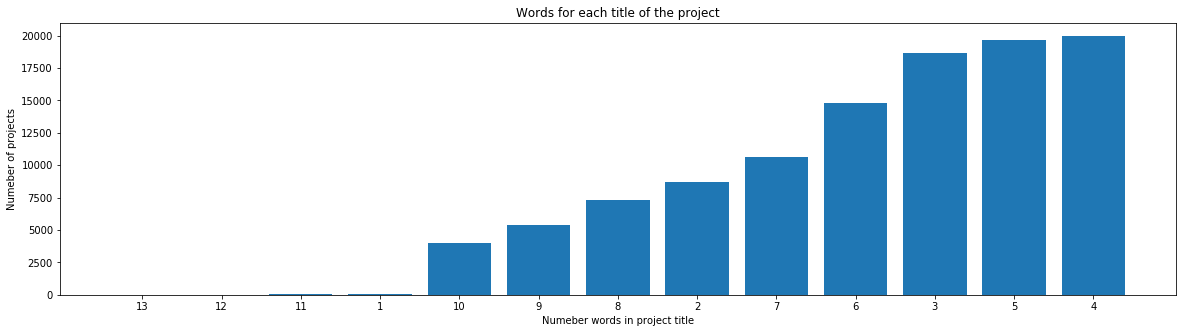

In [28]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
word_count = project_data['project_title'].str.split().apply(len).value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))

plt.ylabel('Numeber of projects')
plt.xlabel('Numeber words in project title')
plt.title('Words for each title of the project')
plt.xticks(ind, list(word_dict.keys()))
plt.show()

__SUMMARY : Univariate Analysis of Text features_title__

1. In project title four numbers of words are occurred in highest and similar equal to five words too
2. Most projects having likewise 3, 5, 4, 6 words in the project title.
3. Very few projects having 13 and 12 words in project title.
4. There is a lot of variability in number of words occurred in project title.


In [29]:
approved_title_word_count = project_data[project_data['project_is_approved']==1]['project_title'].str.split().apply(len)
approved_title_word_count = approved_title_word_count.values

rejected_title_word_count = project_data[project_data['project_is_approved']==0]['project_title'].str.split().apply(len)
rejected_title_word_count = rejected_title_word_count.values

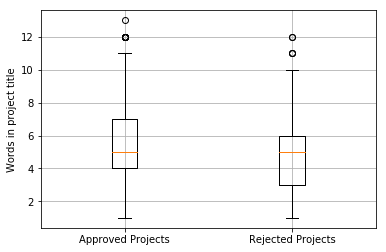

In [30]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_title_word_count, rejected_title_word_count])
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project title')
plt.grid()
plt.show()

__SUMMARY: Box Plots , Words in Project Title__
1. Approved Projects:
whereas 7 words occurred in project titles has been 75 % approved , whereas 5 words occurred in project titles has been 50 % approved and whereas 4 words occurred in project titles has been 25 % approved
2. Rejected projects: 
whereas 6 words occurred in project titles has been 75 % rejected , whereas 5 words occurred in project titles has been 50 % rejected and whereas 3 words occurred in project titles has been 25 % rejected.

3. The Median of the Approved projects is similar to same as Rejected Projects.
4. The number of words in Approved projects somewhat more than the rejected projects.


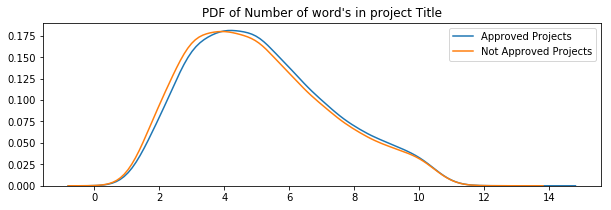

In [31]:
plt.figure(figsize=(10,3))
sns.kdeplot(approved_title_word_count,label="Approved Projects", bw=0.6)
sns.kdeplot(rejected_title_word_count,label="Not Approved Projects", bw=0.6)
plt.legend()
plt.title("PDF of Number of word's in project Title")
plt.show()

__SUMMARY : PDF of No's words in project title__
1. The Mean of Approved Projects is similar to same as not approved projects.
2. PDF is also display the similar results of above Box Plot results.

### 1.2.7 Univariate Analysis: Text features (Project Essay's)

In [32]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [33]:
approved_word_count = project_data[project_data['project_is_approved']==1]['essay'].str.split().apply(len)
approved_word_count = approved_word_count.values

rejected_word_count = project_data[project_data['project_is_approved']==0]['essay'].str.split().apply(len)
rejected_word_count = rejected_word_count.values

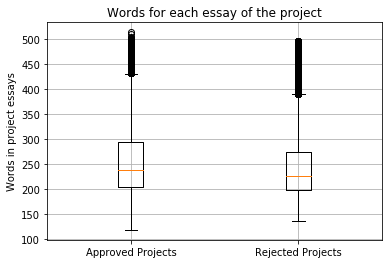

In [34]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_word_count, rejected_word_count])
plt.title('Words for each essay of the project')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project essays')
plt.grid()
plt.show()

__SUMMARY: Words in each essays of the project__

**1. Approved Projects: **
whereas around 290 words in each essays of the project has been 75 % approved , whereas 240 words occurred in each essays of the project has been 50 % approved and whereas avaerage195 words occurred in each essays of the project has been 25 % approved

**2. Rejected Projects: **
whereas around 275 words in each essays of the project has been 75 % rejected , whereas 225 words in each essays of the project has been 50 % rejected and whereas 200 words in each essays of the project has been 25 % rejected.

3. The Median of the Approved projects is roughly to same as Rejected Projects .
4. Approved projects have the larger number of words in project essays than rejected projects

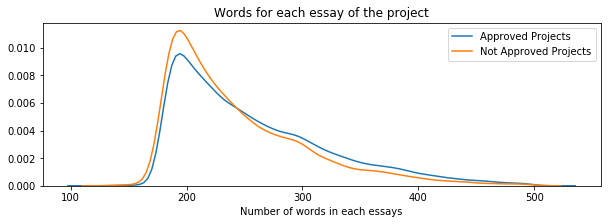

In [35]:
plt.figure(figsize=(10,3))
sns.distplot(approved_word_count, hist=False, label="Approved Projects")
sns.distplot(rejected_word_count, hist=False, label="Not Approved Projects")
plt.title('Words for each essay of the project')
plt.xlabel('Number of words in each essays')
plt.legend()
plt.show()

__SUMMARY : PDF of number of words in each project essays__
1. Number of words in approved projects essays is slightly higher than rejected projects essays.
2. PDF display the same analysis of box plot .
3. The PDF plot display's positively skewed distribution, positively skewed with a very long right tail.

### 1.2.8 Univariate Analysis: Cost per project

In [36]:
# we get the cost of the project using resource.csv file
resource_data.head(2)

id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [37]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

id   price  quantity
0  p000001  459.56         7
1  p000002  515.89        21

In [38]:
# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [39]:
approved_price = project_data[project_data['project_is_approved']==1]['price'].values

rejected_price = project_data[project_data['project_is_approved']==0]['price'].values

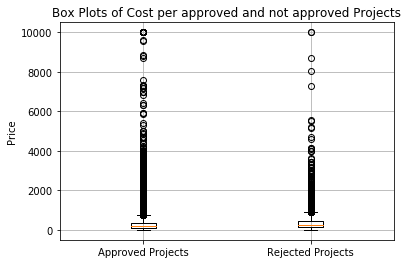

In [40]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_price, rejected_price])
plt.title('Box Plots of Cost per approved and not approved Projects')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Price')
plt.grid()
plt.show()

__SUMMARY: Cost per approved and not approved projects__
1. Very hard to classify by using price feature in box plot.

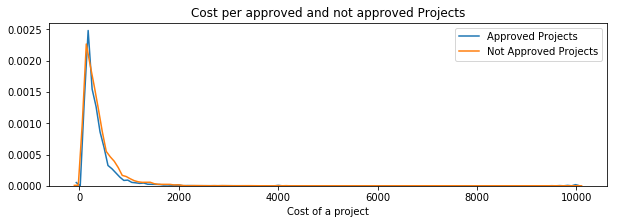

In [41]:
plt.figure(figsize=(10,3))
sns.distplot(approved_price, hist=False, label="Approved Projects")
sns.distplot(rejected_price, hist=False, label="Not Approved Projects")
plt.title('Cost per approved and not approved Projects')
plt.xlabel('Cost of a project')
plt.legend()
plt.show()

__SUMMARY: PDF of Cost Per approved and not approved projects__
1. Very hard to classify by using price feature in distplot , because of overlapping lot.
2. Cost of a not approved projects is slightly higher than approved projects.
3. Not very much helpful of box plot and PDF of price feature. So let’s look at percentiles
4. The plot display's positively skewed distribution, positively skewed with a very long right tail.


In [42]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = ["Percentile", "Approved Projects", "Not Approved Projects"]

for i in range(0,101,5):
    x.add_row([i,np.round(np.percentile(approved_price,i), 3), np.round(np.percentile(rejected_price,i), 3)])
print(x)

+------------+-------------------+-----------------------+
| Percentile | Approved Projects | Not Approved Projects |
+------------+-------------------+-----------------------+
|     0      |        0.66       |          1.97         |
|     5      |       13.59       |          41.9         |
|     10     |       33.88       |         73.67         |
|     15     |        58.0       |         99.109        |
|     20     |       77.38       |         118.56        |
|     25     |       99.95       |        140.892        |
|     30     |       116.68      |         162.23        |
|     35     |      137.232      |        184.014        |
|     40     |       157.0       |        208.632        |
|     45     |      178.265      |        235.106        |
|     50     |       198.99      |        263.145        |
|     55     |       223.99      |         292.61        |
|     60     |       255.63      |        325.144        |
|     65     |      285.412      |         362.39       

__SUMMARY : percentiles of price feature__
1. The 25th percentile of approved project cost is 99.95 dollar and 25th percentile of not approved project cost is 140.892 dollar. 
2. The 50th percentile of approved projects cost is  198.99 dollar and not approved projects cost is 263.145 dollar
3. The 75th percentile of approved project cost is 366.075 dollar and 75th percentile of not approved project cost is 449.945 dollar

4. As per the percentile of price feature and based on the 25th,50th and 75th percentile values , familiarly approved projects cost is lesser than not approved projects cost throughout the all projects.

<h3><font color='red'>1.2.9 Univariate Analysis: teacher_number_of_previously_posted_projects</font></h3>

In [43]:
project_data['teacher_number_of_previously_posted_projects'].head(2)

0    0
1    7
Name: teacher_number_of_previously_posted_projects, dtype: int64

Number of projects thar are previously posted for approved  16058 , ( 34.85414134398333 %)
Number of projects thar are previously posted for not approved  30014 , ( 65.14585865601667 %)


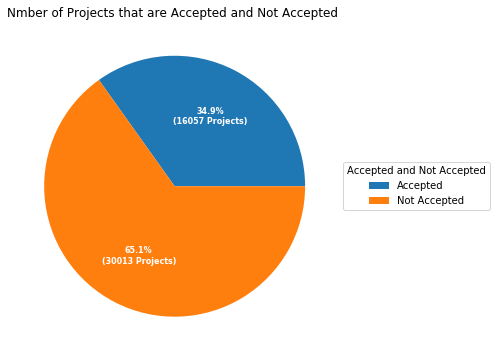

In [44]:
'''# CITATIONS TO CODE (A Pie Chart) : https://matplotlib.org/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py'''

y_value_counts = project_data['teacher_number_of_previously_posted_projects'].value_counts()
print("Number of projects thar are previously posted for approved ", y_value_counts[1], ", (", (y_value_counts[1]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
print("Number of projects thar are previously posted for not approved ", y_value_counts[0], ", (", (y_value_counts[0]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
recipe = ["Accepted", "Not Accepted"]

data = [y_value_counts[1], y_value_counts[0]]
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} Projects)".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, recipe,
          title="Accepted and Not Accepted",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Nmber of Projects that are Accepted and Not Accepted ")

plt.show()

__SUMMARY: Univariate Analysis of teacher_number_of_previously_posted_projects__
1. There is very less probability to approve for teacher_number_of_previously_posted_projects. 
2. There is a huge variability of accepted projects and not accepted projects.
3. 65.1 % projects (30013) has been 'not accepted' and 34.9 % projects(16057) has been accepted .

In [45]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
teacher_number_of_previously_posted_projects_data = project_data.groupby('teacher_id').agg({'teacher_number_of_previously_posted_projects':'sum', 'project_is_approved':'sum'}).reset_index()
teacher_number_of_previously_posted_projects_data.head(5)

teacher_id  \
0  00000f7264c27ba6fea0c837ed6aa0aa   
1  00002d44003ed46b066607c5455a999a   
2  00006084c3d92d904a22e0a70f5c119a   
3  0000a9af8b6b9cc9e41f53322a8b8cf1   
4  0000d4777d14b33a1406dd6c9019fe89   

   teacher_number_of_previously_posted_projects  project_is_approved  
0                                             2                    1  
1                                             1                    2  
2                                             3                    2  
3                                             2                    1  
4                                             0                    1

In [46]:
approved_teacher_number_of_previously_posted_projects = project_data[project_data['project_is_approved']==1]['teacher_number_of_previously_posted_projects'].values

rejected_teacher_number_of_previously_posted_projects = project_data[project_data['project_is_approved']==0]['teacher_number_of_previously_posted_projects'].values

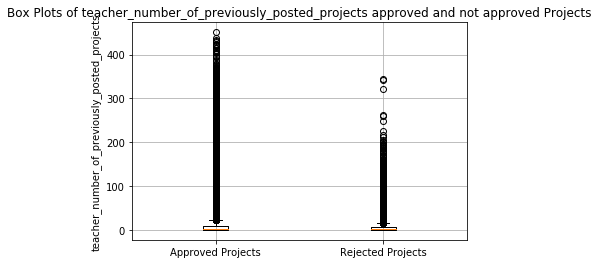

In [47]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_teacher_number_of_previously_posted_projects, rejected_teacher_number_of_previously_posted_projects])
plt.title('Box Plots of teacher_number_of_previously_posted_projects approved and not approved Projects')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('teacher_number_of_previously_posted_projects')
plt.grid()
plt.show()

__SUMMARY : Box Plot teacher_number_of_previously_posted_projects__
1. Very hard to classify with box plots .

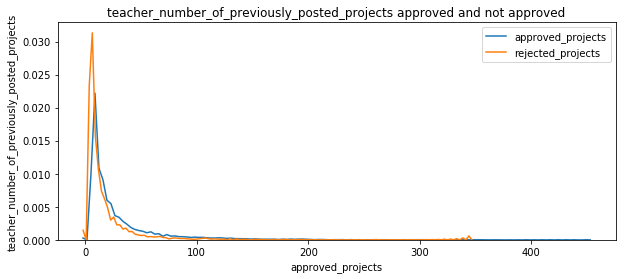

In [48]:
plt.figure(figsize=(10,4))
sns.distplot(approved_teacher_number_of_previously_posted_projects,hist=False,label='approved_projects')
sns.distplot(rejected_teacher_number_of_previously_posted_projects, hist= False, label = 'rejected_projects')
plt.title('teacher_number_of_previously_posted_projects approved and not approved')
plt.xlabel('approved_projects')
plt.ylabel('teacher_number_of_previously_posted_projects')
plt.legend()
plt.show()

___SUMMARY: PDF of teacher number of previously posted projects__
1. Zero number of previously posted projects has been approved 
2. Rejected projects pdf is higher than approved projects pdf.
3. There is a lot of "approved_projects" around 400 - 450 position, having the 0 number of previously posted projects.
4. The PDF display’s positively skewed distribution, positively skewed with a very long right tail.
5. Creating bar plots for better understanding.

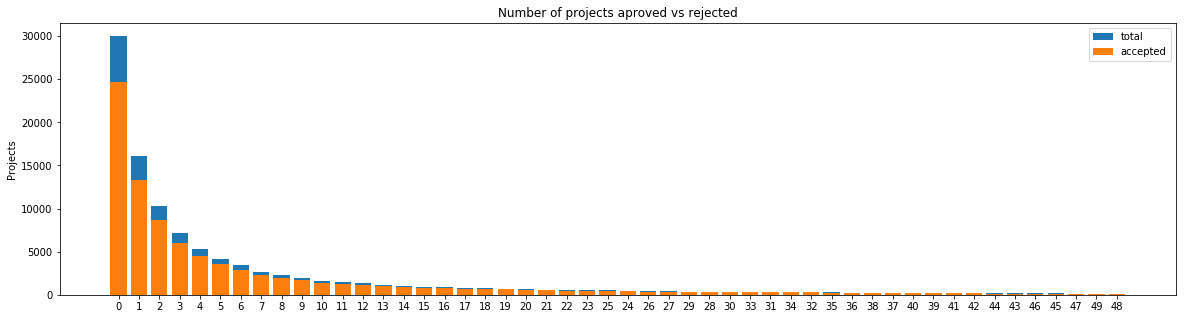

   teacher_number_of_previously_posted_projects  project_is_approved  total  \
0                                             0                24652  30014   
1                                             1                13329  16058   
2                                             2                 8705  10350   
3                                             3                 5997   7110   
4                                             4                 4452   5266   

        Avg  
0  0.821350  
1  0.830054  
2  0.841063  
3  0.843460  
4  0.845423  
    teacher_number_of_previously_posted_projects  project_is_approved  total  \
46                                            46                  149    164   
45                                            45                  141    153   
47                                            47                  129    144   
49                                            49                  128    143   
48                                       

In [49]:
univariate_barplots(project_data, 'teacher_number_of_previously_posted_projects', 'project_is_approved', top=50)

__SUMMARY: PDF of teacher number of previously posted projects__
1. There is a lot of variability in the number of projects previously proposed by the teacher differ in size from 0 to more than 50.
2. 24652 projects has been approved at 0 number of previously posted projects average of 82 % and we observed that it is not mandatory for a teacher to have previously posted projects.
3. Maximum number of teachers, average 82% of the approved projects have been submitted by teachers with no prior project proposals. Administration is looking for highly creative talent teachers only.
4. Lowest of 135 projects has been approved at 48 number of previously posted projects and average of 96 %.
5. Approved projects count is higher than rejected projects.
6. The PDF display’s positively skewed distribution, positively skewed with a very long right tail.

<h3><font color='red'>1.2.10 Univariate Analysis: project_resource_summary</font></h3>

In [50]:
project_data.head(1)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   

                                      project_title  \
0  Educational Support for English Learners at Home   

                                     project_essay_1  \
0  My students are English learners that are work...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   

    clean_categories clean_subcategories  \
0  Literacy_Language        ESL Literacy   

                                               essay  price  quantity  
0  My students are English learners that are work...  154.6        23

In [51]:
datadigit = project_data['project_resource_summary']
import nltk 

def existence_of_numeric_data(datadigit):
    text=nltk.word_tokenize(datadigit)
    pos = nltk.pos_tag(datadigit)
    count = 4
    for i in range(len(pos)):
        word , pos_tag = pos[i]
        if pos_tag == 'CD':
            return True
    return False

existence_of_numeric_data('datadigit')

False

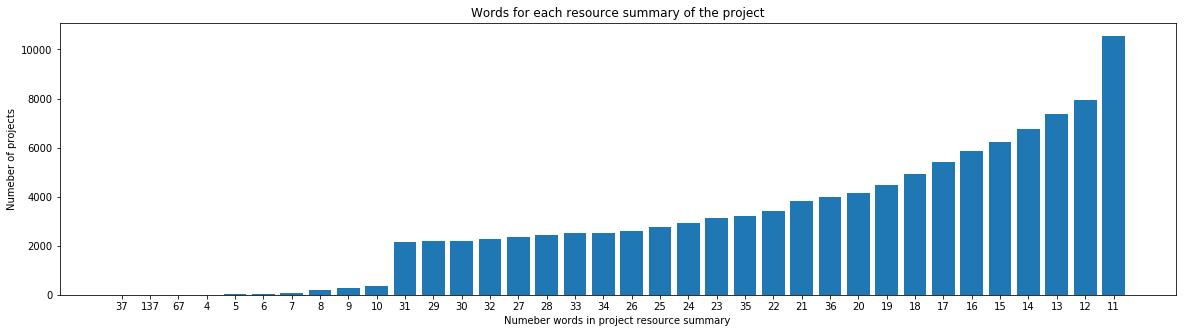

In [52]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
word_count = project_data['project_resource_summary'].str.split().apply(len).value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))

plt.ylabel('Numeber of projects')
plt.xlabel('Numeber words in project resource summary')
plt.title('Words for each resource summary of the project')
plt.xticks(ind, list(word_dict.keys()))
plt.show()

### Summary : project_resource_summary
1. In project_resource_summary eleven numbers of words are occurred in highest projects.
2. Similarly 12 and 13 words also occurred in height projects.
3. Very few projects having 37 and 137 words in project_resource_summary.
4. There is a lot of variability in number of words occurred in project_resource_summary .


In [53]:
approved_project_resourse_summary_word_count = project_data[project_data['project_is_approved']==1]['project_resource_summary'].str.split().apply(len)
approved_project_resourse_summary_word_count = approved_project_resourse_summary_word_count.values

rejected_project_resourse_summary_word_count = project_data[project_data['project_is_approved']==0]['project_resource_summary'].str.split().apply(len)
rejected_project_resourse_summary_word_count = rejected_project_resourse_summary_word_count.values

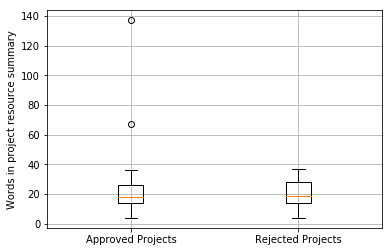

In [54]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_project_resourse_summary_word_count, rejected_project_resourse_summary_word_count])
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project resource summary')
plt.grid()
plt.show()

__SUMMARY : Words in project resource summary__

**1. Approved Projects :**
Whereas around 27 words in project resource summary has been 75 % approved, whereas 18 words occurred in project resource summary has been 50 % approved and whereas average 14 words occurred in project resource summary has been 25 % approved

**2. Rejected Projects: **
whereas around 30 words in project resource summary has been 75 % rejected , whereas 19 words in project resource summary has been 50 % rejected and whereas 15 words in project resource summary has been 25 % rejected.

3. The Median of the Approved projects is roughly to same as Rejected Projects.
4. Both plots were looking similar with small amount of variability.

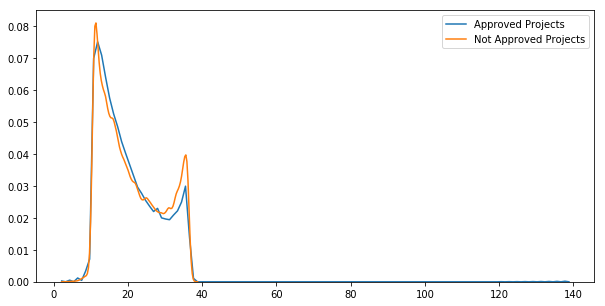

In [55]:
plt.figure(figsize=(10,5))
sns.kdeplot(approved_project_resourse_summary_word_count,label="Approved Projects", bw=0.6)
sns.kdeplot(rejected_project_resourse_summary_word_count,label="Not Approved Projects", bw=0.6)
plt.legend()
plt.show()

##### Summary 

1. hard to classify because of overlapped .

In [56]:
project_data.dtypes


Unnamed: 0                                        int64
id                                               object
teacher_id                                       object
teacher_prefix                                   object
school_state                                     object
project_submitted_datetime                       object
project_grade_category                           object
project_title                                    object
project_essay_1                                  object
project_essay_2                                  object
project_essay_3                                  object
project_essay_4                                  object
project_resource_summary                         object
teacher_number_of_previously_posted_projects      int64
project_is_approved                               int64
clean_categories                                 object
clean_subcategories                              object
essay                                           

In [57]:
list(project_data.select_dtypes(include=[np.number]).columns.values)

['Unnamed: 0',
 'teacher_number_of_previously_posted_projects',
 'project_is_approved',
 'price',
 'quantity']

## 1.3 Text preprocessing

### 1.3.1 Essay Text

In [58]:
project_data.head(1)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   

                                      project_title  \
0  Educational Support for English Learners at Home   

                                     project_essay_1  \
0  My students are English learners that are work...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   

    clean_categories clean_subcategories  \
0  Literacy_Language        ESL Literacy   

                                               essay  price  quantity  
0  My students are English learners that are work...  154.6        23

In [59]:
# printing some random essays.
print(project_data['essay'].values[0])
print("="*127)
print(project_data['essay'].values[150])
print("="*127)
print(project_data['essay'].values[1000])
print("="*127)
print(project_data['essay'].values[20000])
print("="*127)
print(project_data['essay'].values[99999])
print("="*127)


My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

The mediocre teacher tells. The good teacher explains. The superior teacher demonstrates. The great teacher inspires. -William A. Ward\r\n\r\nMy school has 803 students which is makeup is 97.6% African-American, making up the largest segment of the student body. A typical school in Dallas is made up of 23.2% African-American students. Most of the students are on free or reduced lunch. We aren't receiving doctors, lawyers, or engineers children from rich backgrounds or neighborhoods. As an educator I am inspiring minds of young children and we focus not only on academics but one smart, effective, efficient, and disciplined students with good character.In our classroom we can utilize the Bluetooth for swift transitions during class. I use a speaker which doesn't amplify the sound enough to receive the message. Due to the volume of my speaker my students can't hear videos or books clearly and it isn't making the lessons as meaningful. But with the bluetooth speaker my students will be abl

In [60]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [61]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*127)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [62]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [63]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [64]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= {'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"}

In [65]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|████████████████████████████████| 109248/109248 [00:37<00:00, 2900.81it/s]


In [67]:
# after preprocesing
preprocessed_essays[20000]

'my kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism they eager beavers always strive work hardest working past limitations the materials ones i seek students i teach title i school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore have ever felt like ants pants needed groove move meeting this kids feel time the want able move learn say wobble chairs answer i love develop core enhances gross motor turn fine motor skills they also want learn games kids not want sit worksheets they want learn count jumping playing physical engagement key success the number toss color shape mats make happen my students forget work fun 6 year old deserves nannan'

<h3><font color='red'>1.3.2 Project title Text</font></h3>

In [66]:
project_data['project_title'].head(1)

0    Educational Support for English Learners at Home
Name: project_title, dtype: object

In [68]:
# printing some random title texts
print(project_data['project_title'].values[20000])
print('--'*19)
print(project_data['project_title'].values[1959])
print('--'*19)
print(project_data['project_title'].values[1969])
print('--'*19)
print(project_data['project_title'].values[1989])
print('--'*19)


We Need To Move It While We Input It!
--------------------------------------
English Language Learners need literature!
--------------------------------------
Book Bins for My Bookworms!
--------------------------------------
\"Targeting\" Our Indoor Workouts!
--------------------------------------


In [69]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [70]:
sent = decontracted(project_data['project_title'].values[15000])
print(sent)

\r\nThe \"i\" Classroom


In [71]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

  The  i  Classroom


In [72]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

 The i Classroom


In [73]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= {'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"}

In [74]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_project_title = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_project_title.append(sent.lower().strip())

100%|███████████████████████████████| 109248/109248 [00:04<00:00, 26709.47it/s]


In [75]:
# after preprocesing
preprocessed_project_title[15000]

'the classroom'

In [76]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    pharse = re.sub(r"\'s", " Grade", phrase)
    return phrase

In [77]:
sent = decontracted(project_data['project_grade_category'].values[15000])
print(sent)

Grades PreK-2


In [78]:
sent = decontracted(project_data['project_grade_category'].values[15000])
print(sent)

Grades PreK-2


In [79]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

Grades PreK 2


In [80]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= {'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"}

In [81]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_project_grade_category = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_grade_category'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_project_grade_category.append(sent.lower().strip())

100%|███████████████████████████████| 109248/109248 [00:03<00:00, 28582.35it/s]


In [82]:
# after prepossed
preprocessed_project_grade_category[14000]

'grades 6 8'

## 1. 4 Preparing data for models

In [83]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price',
       'quantity'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data
       
       - quantity : numerical
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.4.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/


#### One Hot Encoded Feature : clean_categories

In [84]:
# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['clean_categories'].values)
print(vectorizer.get_feature_names())


clean_categories_one_hot = vectorizer.transform(project_data['clean_categories'].values)
print("Shape of matrix after one hot encodig ",clean_categories_one_hot.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (109248, 9)


#### One Hot Encoded Feature : clean_subcategories

In [85]:
# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['clean_subcategories'].values)
print(vectorizer.get_feature_names())


clean_subcategories_one_hot = vectorizer.transform(project_data['clean_subcategories'].values)
print("Shape of matrix after one hot encodig ",clean_subcategories_one_hot.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (109248, 30)


<h1><font color='orange'>One Hot Encoded Feature: school_state<font></h1>

In [86]:
# Feature encoding with school_state
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for school_state in project_data['school_state'].values:
    my_counter.update(school_state.split())
    
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
school_state_dict = dict(my_counter)
sorted_school_state_dict = dict(sorted(school_state_dict.items(), key=lambda kv: kv[1]))

# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer(vocabulary=list(sorted_school_state_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['school_state'].values)
print(vectorizer.get_feature_names())

school_state_one_hot = vectorizer.transform(project_data['school_state'].values)
print("Shape of matrix after one hot encodig ",school_state_one_hot.shape)

['VT', 'WY', 'ND', 'MT', 'RI', 'SD', 'NE', 'DE', 'AK', 'NH', 'WV', 'ME', 'HI', 'DC', 'NM', 'KS', 'IA', 'ID', 'AR', 'CO', 'MN', 'OR', 'KY', 'MS', 'NV', 'MD', 'CT', 'TN', 'UT', 'AL', 'WI', 'VA', 'AZ', 'NJ', 'OK', 'WA', 'MA', 'LA', 'OH', 'MO', 'IN', 'PA', 'MI', 'SC', 'GA', 'IL', 'NC', 'FL', 'NY', 'TX', 'CA']
Shape of matrix after one hot encodig  (109248, 51)


<h1><font color='orange'>One Hot Encoded Feature: teacher_prefix<font></h1>

In [87]:
# Feature encoding with techer_prifix
# Citation code : https://stackoverflow.com/questions/39303912/tfidfvectorizer-in-scikit-learn-valueerror-np-nan-is-an-invalid-document
# To convert the data type object to unicode string : used  """astype('U')""" code from the above link.
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
# link : https://stackoverflow.com/questions/37147735/remove-nan-value-from-a-set#
# link :https://www.datacamp.com/community/tutorials/categorical-data

project_data = project_data.fillna(project_data['teacher_prefix'].value_counts().index[0])

from collections import Counter
my_counter = Counter()
for word in project_data['teacher_prefix'].values:
    word = str(word)
    my_counter.update(word.split())

    
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
teacher_prefix_dict = dict(my_counter)
sorted_teacher_prefix_dict = dict(sorted(teacher_prefix_dict.items(), key=lambda kv: kv[1]))


# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer(vocabulary=list(sorted_teacher_prefix_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['teacher_prefix'].values.astype('U'))
print(vectorizer.get_feature_names())


teacher_prefix_one_hot = vectorizer.transform(project_data['teacher_prefix'].values.astype('U'))
print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot.shape)

['Dr.', 'Teacher', 'Mr.', 'Ms.', 'Mrs.']
Shape of matrix after one hot encodig  (109248, 5)


<h1><font color='orange' >One Hot Encoded Feature : project_grade_category<font></h1>

In [88]:
# Feature encoding with 'project_grade_category'
catogories = list(project_data['project_grade_category'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039
# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['project_grade_category'] = cat_list


#link : https://www.datacamp.com/community/tutorials/categorical-data
project_data = project_data.fillna(project_data['project_grade_category'].value_counts().index[0])

# Citation code : https://stackoverflow.com/questions/39303912/tfidfvectorizer-in-scikit-learn-valueerror-np-nan-is-an-invalid-document
# To convert the data type object to unicode string : used """astype('U')""" code from the above
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039

from collections import Counter
my_counter = Counter()
for word in project_data['project_grade_category'].values:
    word = str(word)
    my_counter.update(word.split())
    


# dict sort by value python: https://stackoverflow.com/a/613218/4084039
project_grade_category_dict = dict(my_counter)
sorted_project_grade_category_dict = dict(sorted(project_grade_category_dict.items(), key=lambda kv: kv[1]))

# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer(vocabulary=list(sorted_project_grade_category_dict.keys()), lowercase=False, binary=True)

vectorizer.fit(project_data['project_grade_category'].values.astype('U'))
print(vectorizer.get_feature_names())
project_grade_category_one_hot = vectorizer.transform(project_data['project_grade_category'].values.astype('U'))
print("Shape of matrix after one hot encodig ",project_grade_category_one_hot.shape)

['Grades9-12', 'Grades6-8', 'Grades3-5', 'GradesPreK-2']
Shape of matrix after one hot encodig  (109248, 4)


### 1.4.2 Vectorizing Text data

#### 1.4.2.1 Bag of words essays

In [89]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
text_bow = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_bow.shape)

Shape of matrix after one hot encodig  (109248, 16623)


<h4><font color='red'> 1.4.2.2 Bag of Words on `project_title`</font></h4>

In [90]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
text_bow_project_title = vectorizer.fit_transform(preprocessed_project_title)
print("Shape of the Matrix after one hot encoding",text_bow_project_title.shape)

Shape of the Matrix after one hot encoding (109248, 3329)


#### 1.4.2.3 TFIDF vectorizer essays

In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
text_tfidf = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_tfidf.shape)

Shape of matrix after one hot encodig  (109248, 16623)


<h4><font color='red'> 1.4.2.4 TFIDF Vectorizer on `project_title`</font></h4>

In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
text_tfidf_project_title = vectorizer.fit_transform(preprocessed_project_title)
print("Shape of the Matrix after one hot encodig",text_tfidf_project_title.shape)

Shape of the Matrix after one hot encodig (109248, 3329)


#### 1.4.2.5 Using Pretrained Models: Avg W2V

In [93]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [94]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [95]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_essays.append(vector)

print(len(avg_w2v_vectors_essays))
print(len(avg_w2v_vectors_essays[0]))

100%|████████████████████████████████| 109248/109248 [01:21<00:00, 1338.03it/s]


109248
300


<h4><font color='red'> 1.4.2.6 Using Pretrained Models: AVG W2V on `project_title`</font></h4>

In [96]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [97]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [98]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_project_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_project_title): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_project_title.append(vector)

print(len(avg_w2v_vectors_project_title))
print(len(avg_w2v_vectors_project_title[0]))


100%|███████████████████████████████| 109248/109248 [00:05<00:00, 21478.91it/s]


109248
300


#### 1.4.2.7 Using Pretrained Models: TFIDF weighted W2V essays


In [99]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [100]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_essays.append(vector)

print(len(tfidf_w2v_vectors_essays))
print(len(tfidf_w2v_vectors_essays[0]))

100%|█████████████████████████████████| 109248/109248 [09:45<00:00, 186.69it/s]


109248
300


<h4><font color='red'> 1.4.2.9 Using Pretrained Models: TFIDF weighted W2V on `project_title`</font></h4>

In [101]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_project_title)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [102]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_project_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_project_title): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_project_title.append(vector)

print(len(tfidf_w2v_vectors_project_title))
print(len(tfidf_w2v_vectors_project_title[0]))

100%|███████████████████████████████| 109248/109248 [00:10<00:00, 10764.86it/s]


109248
300


### 1.4.3 Vectorizing Numerical features : Price 

In [103]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

Mean : 298.1193425966608, Standard deviation : 367.49634838483496


In [111]:
print(price_standardized)
print("="*15)
print(price_standardized.shape)

[[-0.3905327 ]
 [ 0.00239637]
 [ 0.59519138]
 ...
 [-0.15825829]
 [-0.61243967]
 [-0.51216657]]
(109248, 1)


## Teacher_number_of_previously_posted_projects : Numerical / Standardize

In [107]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

teacher_number_of_previously_posted_projects_scalar = StandardScaler()
teacher_number_of_previously_posted_projects_scalar.fit(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {teacher_number_of_previously_posted_projects_scalar.mean_[0]}, Standard deviation : {np.sqrt(teacher_number_of_previously_posted_projects_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
teacher_number_of_previously_posted_projects_standardized = teacher_number_of_previously_posted_projects_scalar.transform(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

Mean : 11.153165275336848, Standard deviation : 27.77702641477403


In [108]:
print(teacher_number_of_previously_posted_projects_standardized)
print("***************")
print(teacher_number_of_previously_posted_projects_standardized.shape)

[[-0.40152481]
 [-0.14951799]
 [-0.36552384]
 ...
 [-0.29352189]
 [-0.40152481]
 [-0.40152481]]
***************
(109248, 1)


### 1.4.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [112]:
print("Shape of one hot_clean_categories : ", clean_categories_one_hot.shape)
print("Shape of one hot_clean_subcategories : ",clean_subcategories_one_hot.shape)
print("Shape of one hot_school_state : ",school_state_one_hot.shape)
print("Shape of one hot_teacher_prefix : ", teacher_prefix_one_hot.shape)
print("Shape of one hot_project_grade_category : ", project_grade_category_one_hot.shape)
print("Shape of one hot_price_standardized : ", price_standardized.shape)
print("Shape of one hot_teacher_number_of_previously_posted_projects_standardized : ", teacher_number_of_previously_posted_projects_standardized.shape)
print("Shape of one hot_text_bow_project_title : ", text_bow_project_title.shape)
print("Shape of one hot_text_tfidf_project_title : ", text_tfidf_project_title.shape)
print('*******')
print("Length of one hot_tfidf_w2v_vectors_project_title : ", len(tfidf_w2v_vectors_project_title))
print("Length of one hot_tfidf_w2v_vectors_project_title : ", len(tfidf_w2v_vectors_project_title[0]))
print('*******')
print("Length of one hot_avg_w2v_vectors_project_title : ", len(avg_w2v_vectors_project_title))
print("Length of one hot_avg_w2v_vectors_project_title : ", len(avg_w2v_vectors_project_title[0]))

Shape of one hot_clean_categories :  (109248, 9)
Shape of one hot_clean_subcategories :  (109248, 30)
Shape of one hot_school_state :  (109248, 51)
Shape of one hot_teacher_prefix :  (109248, 5)
Shape of one hot_project_grade_category :  (109248, 4)
Shape of one hot_price_standardized :  (109248, 1)
Shape of one hot_teacher_number_of_previously_posted_projects_standardized :  (109248, 1)
Shape of one hot_text_bow_project_title :  (109248, 3329)
Shape of one hot_text_tfidf_project_title :  (109248, 3329)
*******
Length of one hot_tfidf_w2v_vectors_project_title :  109248
Length of one hot_tfidf_w2v_vectors_project_title :  300
*******
Length of one hot_avg_w2v_vectors_project_title :  109248
Length of one hot_avg_w2v_vectors_project_title :  300


In [113]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X = hstack((clean_categories_one_hot,clean_subcategories_one_hot,school_state_one_hot,teacher_prefix_one_hot,project_grade_category_one_hot,price_standardized,teacher_number_of_previously_posted_projects_standardized,text_bow_project_title,text_tfidf_project_title,tfidf_w2v_vectors_project_title,avg_w2v_vectors_project_title))
X.shape



(109248, 7359)

In [114]:
from scipy import sparse
sparse.find(X)

(array([    47,    248,    287, ..., 109245, 109246, 109247], dtype=int32),
 array([   0,    0,    0, ..., 7358, 7358, 7358], dtype=int32),
 array([ 1.        ,  1.        ,  1.        , ..., -0.0891534 ,
        -0.256794  ,  0.00818183]))

In [115]:
X.shape[1]
type(X)

scipy.sparse.coo.coo_matrix

<h1><font color='red'>Assignment 2: Apply TSNE<font></h1>

 <font color=#F4274F>If you are using any code snippet from the internet, you have to provide the reference/citations, as we did in the above cells. Otherwise, it will be treated as plagiarism without citations.</font>

<ol> 
    <li> In the above cells we have plotted and analyzed many features. Please observe the plots and write the observations in markdown cells below every plot.</li>
    <li> EDA: Please complete the analysis of the feature: teacher_number_of_previously_posted_projects</li>
    <li>
        <ul>Build the data matrix using these features 
            <li>school_state : categorical data (one hot encoding)</li>
            <li>clean_categories : categorical data (one hot encoding)</li>
            <li>clean_subcategories : categorical data (one hot encoding)</li>
            <li>teacher_prefix : categorical data (one hot encoding)</li>
            <li>project_grade_category : categorical data (one hot encoding)</li>
            <li>project_title : text data (BOW, TFIDF, AVG W2V, TFIDF W2V)</li>
            <li>price : numerical</li>
            <li>teacher_number_of_previously_posted_projects : numerical</li>
         </ul>
    </li>
    <li> Now, plot FOUR t-SNE plots with each of these feature sets.
        <ol>
            <li>categorical, numerical features + project_title(BOW)</li>
            <li>categorical, numerical features + project_title(TFIDF)</li>
            <li>categorical, numerical features + project_title(AVG W2V)</li>
            <li>categorical, numerical features + project_title(TFIDF W2V)</li>
        </ol>
    </li>
    <li> Concatenate all the features and Apply TNSE on the final data matrix </li>
    <li> <font color='blue'>Note 1: The TSNE accepts only dense matrices</font></li>
    <li> <font color='blue'>Note 2: Consider only 5k to 6k data points to avoid memory issues. If you run into memory error issues, reduce the number of data points but clearly state the number of datat-poins you are using</font></li>
</ol>

# Assignment 2 


4.A

<h2> 2.1 TSNE with `BOW` encoding of `project_title` feature with 5000 Data Points </h2> 

In [116]:
import numpy as np
from sklearn.manifold import TSNE
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X = hstack((clean_categories_one_hot,clean_subcategories_one_hot,school_state_one_hot,teacher_prefix_one_hot,
            project_grade_category_one_hot,price_standardized,teacher_number_of_previously_posted_projects_standardized,
            text_bow_project_title))
X.shape

(109248, 3430)

In [117]:
#Reference :https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.coo_matrix.tocsr.html
#Reference :https://kite.com/python/docs/scipy.sparse.dok_matrix.toarray
from scipy.sparse import coo_matrix
X = X.tocsr()
X_5K_data=X[0:5000,:]
X_5K_data =  X_5K_data.toarray() 

In [118]:
model = TSNE(n_components = 2, perplexity = 30, random_state = 0)
tsne_data_bow = model.fit_transform(X_5K_data)
labels = project_data["project_is_approved"]
labels_5K = labels[0:5000]
len(labels_5K)

5000

In [119]:
tsne_data_bow = np.vstack((tsne_data_bow.T, labels_5K)).T
tsne_df_bow = pd.DataFrame(tsne_data_bow, columns= ( "Dim1" , "Dim2" , "Labels" ))
tsne_df_bow.shape

(5000, 3)

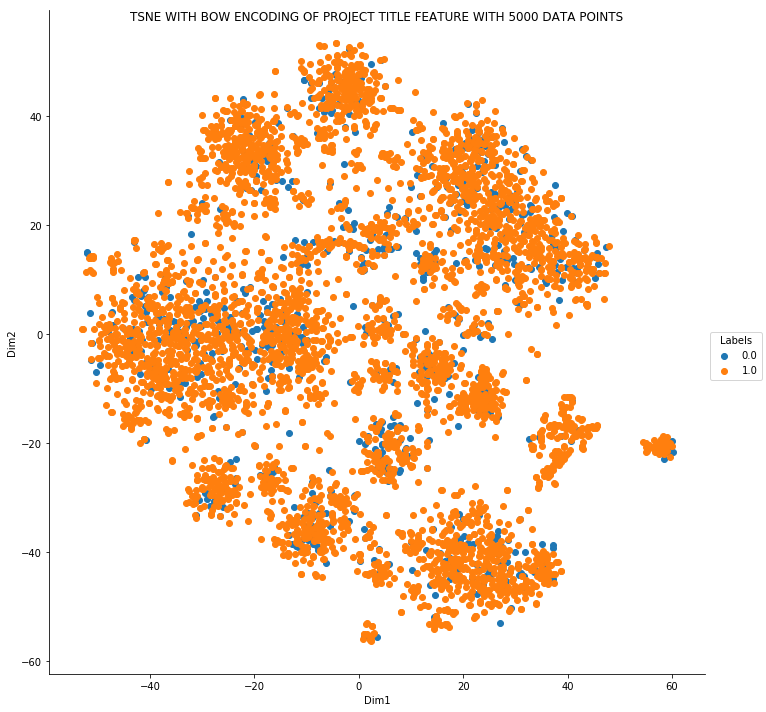

In [120]:
# writing all of the code with proper documentation and proper titles for each subsection
# when i plot any graph i will make sure to use Title, Legends if needed, X-axis label, Y-axis label

sns.FacetGrid(tsne_df_bow, hue = "Labels", size = 10).map(plt.scatter, "Dim1", "Dim2").add_legend().fig.suptitle("TSNE WITH BOW ENCODING OF PROJECT TITLE FEATURE WITH 5000 DATA POINTS ")

plt.show()

### Summary :
1. points are over lapping alot . 
2. will chek by chaning the perplexity = 50 

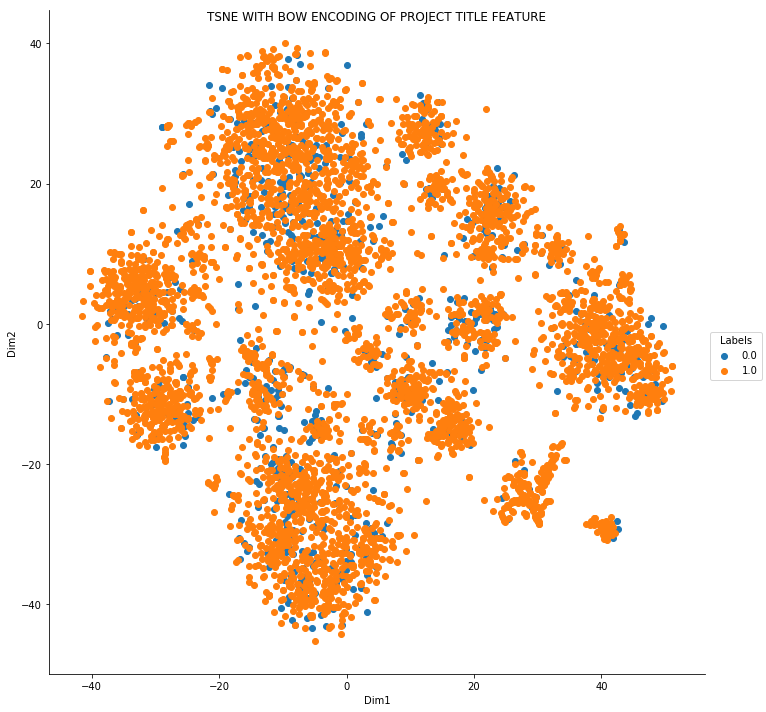

In [121]:
model = TSNE(n_components = 2, perplexity = 50, random_state = 0)
tsne_data_bow = model.fit_transform(X_5K_data)
labels = project_data["project_is_approved"]
labels_5K = labels[0:5000]

tsne_data_bow = np.vstack((tsne_data_bow.T, labels_5K)).T
tsne_df_bow = pd.DataFrame(tsne_data_bow, columns= ( "Dim1" , "Dim2" , "Labels" ))

sns.FacetGrid(tsne_df_bow, hue = "Labels", size = 10).map(plt.scatter, "Dim1", "Dim2").add_legend().fig.suptitle("TSNE WITH BOW ENCODING OF PROJECT TITLE FEATURE ")
plt.show()

### Summary :

1. perplexicty = 30 : Hard to classify because of overlapping a lot 
2. perplexicty = 50 : Even throgh by changing the perplexity aslo it is Hard to classify because of overlapping a lot .

<h2> 2.2 TSNE with `TFIDF` encoding of `project_title` feature with 5000 Data points </h2>

In [122]:
import numpy as np
from sklearn.manifold import TSNE
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X = hstack((clean_categories_one_hot,clean_subcategories_one_hot,school_state_one_hot,teacher_prefix_one_hot,
            project_grade_category_one_hot,price_standardized,teacher_number_of_previously_posted_projects_standardized,
            text_tfidf_project_title))
X.shape

(109248, 3430)

In [123]:
#Reference :https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.coo_matrix.tocsr.html
#Reference :https://kite.com/python/docs/scipy.sparse.dok_matrix.toarray
from scipy.sparse import coo_matrix
X = X.tocsr()
X_5K_data = X[0:5000,:]
X_5K_data = X_5K_data.toarray() 

model = TSNE(n_components = 2, perplexity = 50, random_state = 0)
tsne_data_tfidf = model.fit_transform(X_5K_data)
labels = project_data["project_is_approved"]
labels_5K = labels[0:5000]

tsne_data_tfidf = np.vstack((tsne_data_tfidf.T, labels_5K)).T
tsne_df_tfidf = pd.DataFrame(tsne_data_tfidf, columns= ( "Dim1" , "Dim2" , "Labels" ))


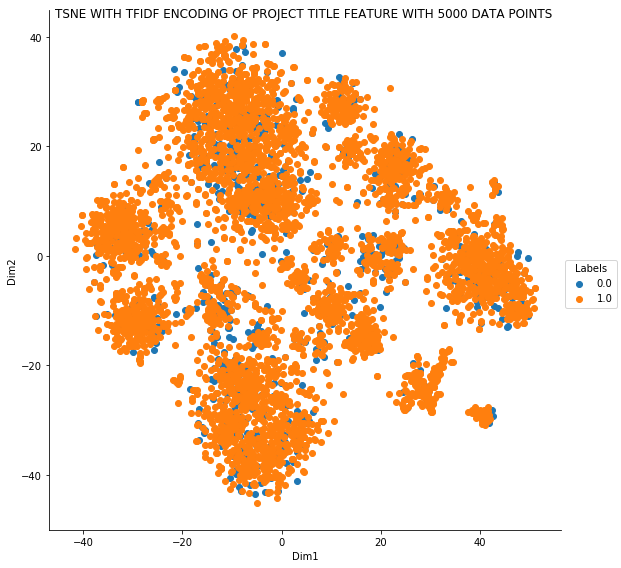

In [124]:
# writing all of the code with proper documentation and proper titles for each subsection
# when i plot any graph i will make sure to use Title, Legends if needed, X-axis label, Y-axis label

sns.FacetGrid(tsne_df_bow, hue = "Labels", size = 8).map(plt.scatter, "Dim1", "Dim2").add_legend().fig.suptitle("TSNE WITH TFIDF ENCODING OF PROJECT TITLE FEATURE WITH 5000 DATA POINTS ")
plt.show()

### Summary :

1.  Hard to classify because of overlapping a lot .

<h2> 2.3 TSNE with `AVG W2V` encoding of `project_title` feature WITH 5000 Data points </h2>

In [125]:
X = hstack((clean_categories_one_hot,clean_subcategories_one_hot,school_state_one_hot,teacher_prefix_one_hot,
            project_grade_category_one_hot,price_standardized,teacher_number_of_previously_posted_projects_standardized,
            avg_w2v_vectors_project_title))
np.shape(X)    

(109248, 401)

In [126]:
#Reference :https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.coo_matrix.tocsr.html
#Reference :https://kite.com/python/docs/scipy.sparse.dok_matrix.toarray
X = X.tocsr()
X_5K_data = X[0:5000, :]
X_5K_data = X_5K_data.toarray()

model = TSNE(n_components = 2, perplexity = 50, random_state = 0)
tsne_data_avg_w2v = model.fit_transform(X_5K_data)
labels = project_data["project_is_approved"]
labels_5K = labels[0:5000]

tsne_data_avg_w2v = np.vstack((tsne_data_avg_w2v.T, labels_5K)).T
tsne_df_avg_w2v = pd.DataFrame(tsne_data_avg_w2v, columns=("Dim1", "Dim2", "Labels"))


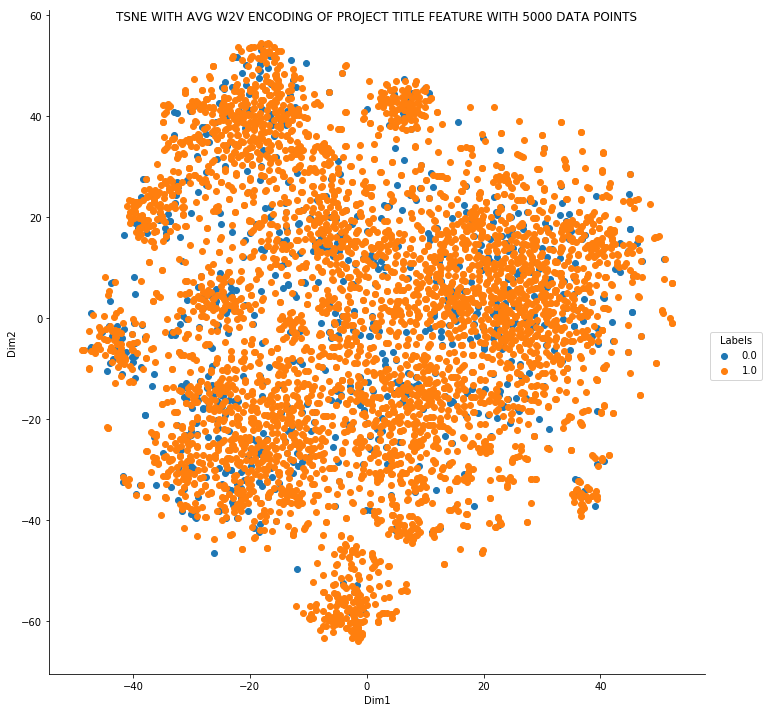

In [127]:
# writing all of the code with proper documentation and proper titles for each subsection
# when i plot any graph i will make sure to use Title, Legends if needed, X-axis label, Y-axis label

sns.FacetGrid(tsne_df_avg_w2v, hue = "Labels", size = 10).map(plt.scatter, "Dim1", "Dim2").add_legend().fig.suptitle("TSNE WITH AVG W2V ENCODING OF PROJECT TITLE FEATURE WITH 5000 DATA POINTS ")
plt.show()

### Summary : TSNE with AVG_W2V project_title (perplexity = 50)
*** Points were  separated group wise with Overlapping a lot , So its not possiable to classify.

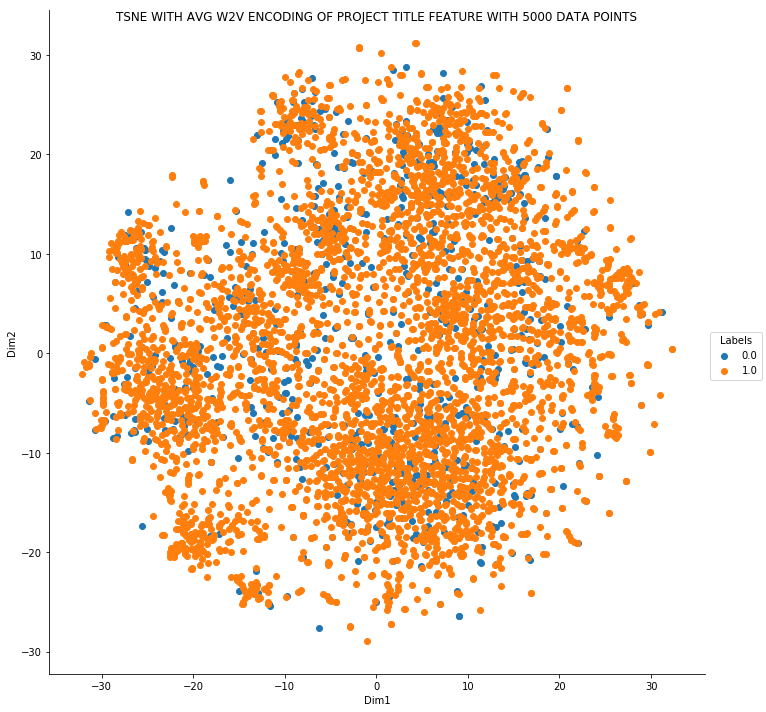

In [128]:
# Changing the PERPLEXITY = 100
X = hstack((clean_categories_one_hot,clean_subcategories_one_hot,school_state_one_hot,teacher_prefix_one_hot,
            project_grade_category_one_hot,price_standardized,teacher_number_of_previously_posted_projects_standardized,
            avg_w2v_vectors_project_title))

X = X.tocsr()
X_5K_data = X[0:5000, :]
X_5K_data = X_5K_data.toarray()

model = TSNE(n_components = 2, perplexity = 100, random_state = 0)
tsne_data_avg_w2v = model.fit_transform(X_5K_data)
labels = project_data["project_is_approved"]
labels_5K = labels[0:5000]

tsne_data_avg_w2v = np.vstack((tsne_data_avg_w2v.T, labels_5K)).T
tsne_df_avg_w2v = pd.DataFrame(tsne_data_avg_w2v, columns=("Dim1", "Dim2", "Labels"))

sns.FacetGrid(tsne_df_avg_w2v, hue = "Labels", size = 10).map(plt.scatter, "Dim1", "Dim2").add_legend().fig.suptitle("TSNE WITH AVG W2V ENCODING OF PROJECT TITLE FEATURE WITH 5000 DATA POINTS ")
plt.show()

#### Summary : 
* By changing the perplexity = 100, then also points were overlapped and hard to classify.

<h2> 2.4 TSNE with `TFIDF Weighted W2V` encoding of `project_title` feature </h2>

In [129]:
X = hstack((clean_categories_one_hot,clean_subcategories_one_hot,school_state_one_hot,teacher_prefix_one_hot,
            project_grade_category_one_hot,price_standardized,teacher_number_of_previously_posted_projects_standardized,
            tfidf_w2v_vectors_project_title))
X.shape

(109248, 401)

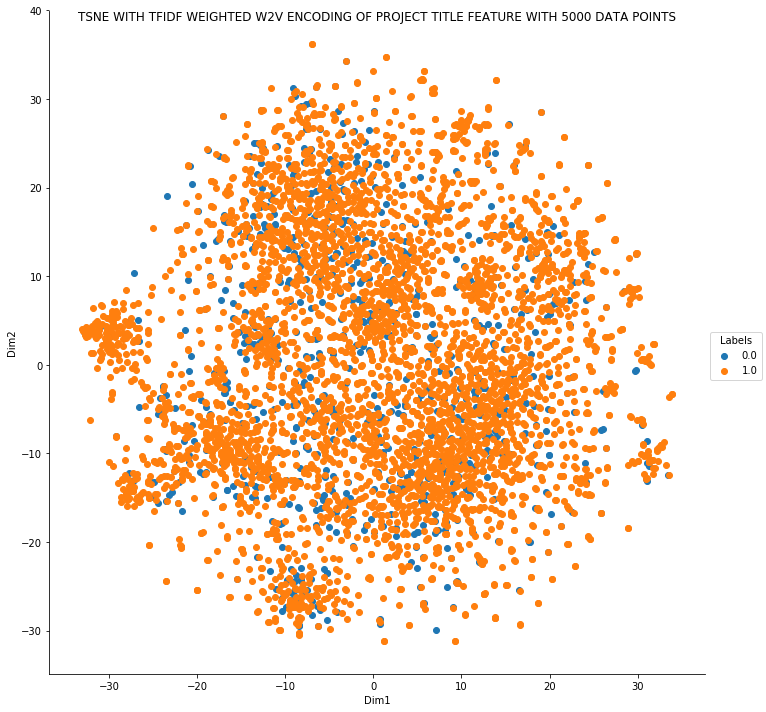

In [130]:
X = X.tocsr()
X_5K_data = X[0:5000, :]
X_5K_data = X_5K_data.toarray()

model = TSNE(n_components = 2 , perplexity = 100 , random_state = 0)
tsne_data_tfidf_w2v = model.fit_transform(X_5K_data)
labels = project_data["project_is_approved"]
labels_5K = labels[0:5000]

tsne_data_tfidf_w2v = np.vstack((tsne_data_tfidf_w2v.T, labels_5K)).T
tsne_df_tfidf_w2v = pd.DataFrame(tsne_data_tfidf_w2v, columns = ("Dim1", "Dim2" , "Labels"))

# writing all of the code with proper documentation and proper titles for each subsection
# when i plot any graph i will make sure to use Title, Legends if needed, X-axis label, Y-axis label

sns.FacetGrid(tsne_df_tfidf_w2v, hue = "Labels", size = 10).map(plt.scatter, "Dim1", "Dim2").add_legend().fig.suptitle("TSNE WITH TFIDF WEIGHTED W2V ENCODING OF PROJECT TITLE FEATURE WITH 5000 DATA POINTS ")
plt.show()



### Summary : TSNE with  BOW, TFIDF, AVG_W2V, TFIDF Weighted W2V , encoding of project_title 

1. We verified tsne ploting with bow,tfidf,avg_w2v,tfidf_w2v of project_title by changimng the diffrent value with perplexity . but its very hard to classify due to overlapping issue .It might be the issue with less datapoints(5000 Data points).
2. Or else need to check with project_essay feature with all data points for better visuval understanding .

<h2> 2.5 Overall Summary </h2>

**92706 projects that are approved for funding and 84.9 % Approved**     
**16542 projects that are not approved for funding and 15.1 % not approved.**    
  

**Every state has greater than 80% success rate in approval**      
**In California (CA) State highest Projects (15388) has been submitted and average 85% projects (13205) approved.**         **In Vermont (VT) State lowest Projects (80) has been submitted and average 80% projects (64) approved.**    


**Mrs. has been submitted the highest projects (57269) and average 85 % projects (48997) accepted.**    
**Dr. teachers has been submitted the lowest projects (13) and average 69 % projects (9) accepted.**     

**Grades 3-5 is the highest approval rate of 85 % under project_grade_category.**      
**In Grades Prek-2 has been submitted the highest projects (44225) and average 84 % projects (37536) accepted.**      
**In Grades 9-12 has been submitted the lowest projects (10963) and average 83% Projects (9183) accepted.**        


**Highest projects (23655) has been submitted in Literacy_Language clean_categorie and average 86 % projects (20520) accepted.** .     
**Lowest projects (1309) has been submitted in Warmth Care_Hunger clean_categorie and Avg 92% Projects (1212) accepted.**      
**Joint categories of Literacy_Language Math_scince is also have the 86 % approval rate**

**Highest projects (9486) has been submitted in Literacy clean_subcategorie and average 88 % projects (8371) accepted.**     
**Lowest projects (405) has been submitted in AppliedSciences College_CareerPrep clean_subcategorie and average 81% Projects (330) accepted.**


**In project title four numbers of words are occurred in highest and similar equal to five words occurred in project title**       
**Most projects having likewise 3, 5, 4, 6 words in the project title.**      
**Very few projects having 13 and 12 words in project title.**
**The Median of the Approved projects is similar to same as Rejected Projects in box plot of project title.**    
**The number of words in Approved projects somewhat more than the rejected projects.**



**Approved Projects: whereas around 290 words in each essays of the project has been 75 % approved , whereas 240 words occurred in each essays of the project has been 50 % approved and whereas avaerage195 words occurred in each essays of the project has been 25 % approved**      

**Rejected Projects: whereas around 275 words in each essays of the project has been 75 % rejected , whereas 225 words in each essays of the project has been 50 % rejected and whereas 200 words in each essays of the project has been 25 % rejected.**

**The Median of the Approved projects is roughly to same as Rejected Projects in project essays.**        
**Approved projects have the larger number of words in project essays than rejected projects.**


**As per the percentiles of price feature and based on the 25th,50th and 75th percentile values , familiarly approved projects cost is lesser than not approved projects cost throughout the all project**

**The 75th percentile of approved project cost is 366.075 dollar and 7th percentile of not approved project cost is 449.945 dollar.**

**The 50th percentile of approved projects cost is 198.99 dollar and not approved projects cost is 263.145 dollar.**

**The 25th percentile of approved project cost is 99.95 dollar and 25th percentile of not approved project cost is 140.892 dollar.**

**Maximum number of teachers, average 82% of the approved projects have been submitted by teachers with no prior project proposals. Administration is looked for highly creative talent teachers only.**

**24652 projects has been approved at 0 number of previously posted projects average of 82 % and we observed that it is not mandatory for a teacher to have previously posted projects.**

**Lowest of 135 projects has been approved at 48 number of previously posted projects and average of 96 %.**

**We verified tsne ploting with bow,tfidf,avg_w2v,tfidf_w2v of project_title by changimng the diffrent value with perplexity . but its very hard to classify due to overlapping issue .It might be the issue with less datapoints(5000 Data points).**

**Or else need to check with project_essay feature with all data points for better visuval understanding.**

# * Thank you *